##### Loading the data

In [ ]:
import numpy as np

data_path = '/home/yigit/Documents/projects/irl_sfm/data/demonstrations/1588732580.npy'
tracks = np.load(data_path, allow_pickle=True, encoding='latin1')
tracks = tracks[:-1]  # the last one was not complete, discarding it
num_tracks = len(tracks)

##### Normalizing lengths of trajectories

In [39]:
xs, ys = [], []
desired_len = 200

for i in range(num_tracks):
    # normalizing the lengths
    len_track = len(tracks[i])
    indices = np.linspace(0, len_track-1, desired_len, dtype=int)  # <desired_len>-many indices are selected uniformly
    x, y = [], []
    for index in indices:
        x.append(tracks[i][index][0])
        y.append(tracks[i][index][1])
    xs.append(x)
    ys.append(y)

##### Just plotting with robot

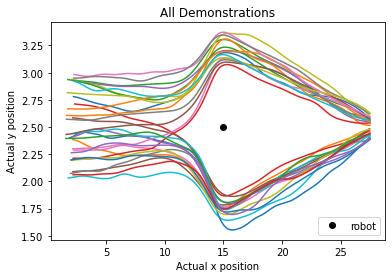

In [40]:
import matplotlib.pyplot as plt

for i in range(num_tracks):
    x, y = xs[i], ys[i]
    plt.plot(x, y)
plt.plot([15], [2.5], 'ko', label = 'robot')
plt.title('All Demonstrations')
plt.xlabel('Actual x position')
plt.ylabel('Actual y position')
plt.legend(loc='lower right')
plt.show()

##### Normalizing x values to [-1, 1] and plotting again

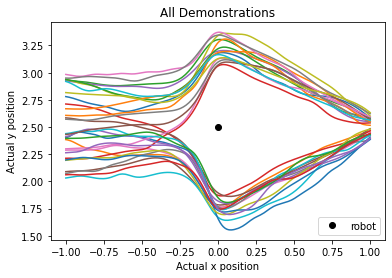

In [41]:
d_xs, d_ys = [], []

for i in range(num_tracks):
    x = np.array(xs[i])
    x = ((x - np.min(x)) / (np.max(x) - np.min(x))) * 2 - 1
    d_xs.append(x)
    d_ys.append(np.array(ys[i]))
    
    plt.plot(x, ys[i])
plt.plot([0], [2.5], 'ko', label = 'robot')
plt.title('All Demonstrations')
plt.xlabel('Actual x position')
plt.ylabel('Actual y position')
plt.legend(loc='lower right')
plt.show()

##### Info on data

In [42]:
print(f'x_demonstrations_shape={np.array(d_xs).shape}')
print(f'y_demonstrations_shape={np.array(d_ys).shape}')

x_demonstrations_shape=(30, 200)
y_demonstrations_shape=(30, 200)


---
##### Saving the data

In [43]:
from sklearn.model_selection import train_test_split

data_path = '/home/yigit/phd/yigit_phd_thesis/cnmp/data/pedsim_'

# reshaping to meet CNMP requirements
d_xs = np.array(d_xs).reshape((np.shape(d_xs)[0], np.shape(d_xs)[1], 1))
d_ys = np.array(d_ys).reshape((np.shape(d_ys)[0], np.shape(d_ys)[1], 1))

# saving 10% for validation and the 90% for training
x_train, x_val, y_train, y_val = train_test_split(d_xs, d_ys, test_size=0.1, random_state=42)

np.save(data_path+'d_x.npy', np.array(x_train))
np.save(data_path+'d_y.npy', np.array(y_train))
np.save(data_path+'v_d_x.npy', np.array(x_val))
np.save(data_path+'v_d_y.npy', np.array(y_val))